[[0.81112191 1.10692255]
 [1.22188726 1.01773952]]


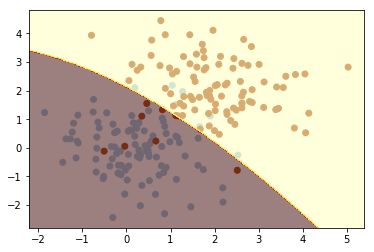

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
# %matplotlib inline
np.random.seed(1)
data_a = np.random.normal(loc=(0,0),scale=1, size=(100, 2))
data_b = np.random.normal(loc=(2,2),scale=1, size=(100, 2))

label_a = np.full((100, 1), 0, dtype=int)
label_b = np.full((100, 1), 1, dtype=int)


data = np.concatenate([data_a, data_b],axis=0)
label = np.concatenate([label_a, label_b],axis=0)
data_all = np.concatenate([data, label],axis=1)
data = pd.DataFrame(data_all)

data.columns=['x','y','label'] 

all_data = data[['x', 'y',]]
all_label = data['label']
train_data, test_data, train_label, test_label = train_test_split(all_data, all_label,test_size=0.5, random_state=1)


model = GaussianNB()
model.fit(train_data, train_label)
plt.scatter(data['x'],data['y'], c=data['label'], cmap=plt.cm.Paired)

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
x = np.linspace(xmin, xmax, 250)
y = np.linspace(ymin, ymax, 250)
X, Y = np.meshgrid(x, y)
    
Z = model.predict(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)
plt.contourf(X, Y, Z, cmap='hot', alpha=0.5)

print(model.sigma_ )
